## 머신러닝 과제: 야구 선수 연봉 예측 

- 과제 목표: 최동원 선수의 연봉을 현재 수준 기준으로 예측하는 것 

### 문제 1

> 최동원 선수의 1983년부터 1988년 데이터와 당대 투수들의 데이터(연봉포함)를 구하고, 2015년부터 2020년까지의 프로야구 투수들의 데이터를 구하시오.

In [145]:
from urllib.request import urlopen
from selenium import webdriver
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import pandas as pd
from selenium.webdriver.support.ui import Select
from lxml import html
import time
import warnings
warnings.filterwarnings('ignore')

##### 당대 투수 데이터 불러오기

In [100]:
# table 정도 한번에 불러오는 html_table_paser의 make2d 기능 test

from urllib.request import urlopen
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
from selenium.webdriver.support.ui import Select
import pandas as pd

url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx"
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
baseball = soup.find_all('table')
table = parser_functions.make2d(baseball[0])
df_baseball = pd.DataFrame(table)
df_baseball

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
1,1,반즈,롯데,0.54,5,4,0,0,0,1.000,33 1/3,27,1,8,3,34,6,2,1.05
2,2,루친스키,NC,1.13,5,2,2,0,0,0.500,32,25,0,2,2,31,6,4,0.84
3,3,최원태,키움,1.29,4,2,0,0,0,1.000,21,14,0,7,0,10,4,3,1.00
4,3,노경은,SSG,1.29,4,3,1,0,0,0.750,21,14,0,5,1,14,3,3,0.90
5,5,폰트,SSG,1.36,5,3,1,0,0,0.750,33,16,1,6,2,26,6,5,0.67
6,6,양현종,KIA,1.71,5,1,2,0,0,0.333,31 2/3,20,0,6,1,29,11,6,0.82
7,7,로니,KIA,1.71,4,2,1,0,0,0.667,21,18,2,9,2,19,11,4,1.29
8,8,박세웅,롯데,1.82,4,3,0,0,0,1.000,24 2/3,23,0,7,0,24,7,5,1.22
9,9,고영표,KT,1.93,4,1,2,0,0,0.333,28,15,1,3,5,28,6,6,0.64


In [119]:
url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx"

driver = webdriver.Chrome("../../driver/chromedriver.exe")
driver.get(url)

In [232]:
# 연도 정보 리스트에 정리
year_list_raw = driver.find_elements_by_tag_name('option')
year_list_raw
year_list = []
for option in year_list_raw:
    year_list.append(option.get_attribute("value"))

year_list = year_list[1:39]

In [233]:
# 구하려는 연도 리스트에 정리(1983~1988, 2015~2020)
year_list1 = year_list[:6]
year_list2 = year_list[-6:]
year_list1, year_list2
year_list = year_list1 + year_list2

In [234]:
year_list

['1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020']

In [368]:
# 팀 리스트 가져오기

page = urlopen(url)
source = page.read()
soup = BeautifulSoup(source, 'html.parser')
team_list_raw = soup.find('select', {'id':'cphContents_cphContents_cphContents_ddlTeam_ddlTeam'})
team_list = team_list_raw.get_() # text가 아니라 value값으로 불어와야 select_by_value를 먹힐 수 있음 
team_name = team_list.split('\n')
team_name = team_name[2:-1]

In [369]:
team_name

['두산', '롯데', '삼성', '키움', '한화', 'KIA', 'KT', 'LG', 'NC', 'SSG']

In [395]:
url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx"
driver = webdriver.Chrome("../../driver/chromedriver.exe")
driver.get(url)
get_table = Select(driver.find_element_by_name('ctl00$ctl00$ctl00$cphContents$cphContents$cphContents$ddlTeam$ddlTeam'))
get_table.select_by_visible_text('삼성')
soup = BeautifulSoup(driver.page_source, 'html.parser')
baseball = soup.find_all('table')
table = parser_functions.make2d(baseball[0])
df = pd.DataFrame(table, columns = table[0])
driver.close()
df

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
1,1,김광현,SSG,0.36,4,3,0,0,0,1.000,25,10,1,5,0,23,2,1,0.60
2,2,반즈,롯데,0.54,5,4,0,0,0,1.000,33 1/3,27,1,8,3,34,6,2,1.05
3,3,루친스키,NC,1.13,5,2,2,0,0,0.500,32,25,0,2,2,31,6,4,0.84
4,4,폰트,SSG,1.36,5,3,1,0,0,0.750,33,16,1,6,2,26,6,5,0.67
5,5,양현종,KIA,1.71,5,1,2,0,0,0.333,31 2/3,20,0,6,1,29,11,6,0.82
6,6,로니,KIA,1.71,4,2,1,0,0,0.667,21,18,2,9,2,19,11,4,1.29
7,7,박세웅,롯데,1.76,5,3,0,0,0,1.000,30 2/3,30,0,8,0,31,8,6,1.24
8,8,최원준,두산,1.84,5,2,2,0,0,0.500,29 1/3,26,1,5,1,20,11,6,1.06
9,9,고영표,KT,1.93,4,1,2,0,0,0.333,28,15,1,3,5,28,6,6,0.64


In [410]:
# KBO 공식 홈페이지에서 데이터 수집
# 연도별로 팀별 클릭해서 테이블 수집 
url = "https://www.koreabaseball.com/Record/Player/PitcherBasic/Basic1.aspx"
driver = webdriver.Chrome("../../driver/chromedriver.exe")
driver.get(url)

blank = []
for year in year_list:
        get_table = Select(driver.find_element_by_name('ctl00$ctl00$ctl00$cphContents$cphContents$cphContents$ddlSeason$ddlSeason'))
        get_table.select_by_value(year)
        time.sleep(1)

        for team in team_name:
            try:
                get_table = driver.find_element_by_name('ctl00$ctl00$ctl00$cphContents$cphContents$cphContents$ddlTeam$ddlTeam')
                get_table.send_keys(team)
                time.sleep(1)
        
                soup = BeautifulSoup(driver.page_source, 'html.parser') 
                baseball = soup.find_all('table')
                table = parser_functions.make2d(baseball[0])
                df = pd.DataFrame(table, columns = table[0])
                df = df.iloc[1:,1:]
                df['연도'] = year
                blank.append(df)
            except:
                print('No page')
            

df_baseball = pd.concat(blank, axis=0)

In [411]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 1 to 29
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     2273 non-null   object
 1   팀명      2273 non-null   object
 2   ERA     2273 non-null   object
 3   G       2273 non-null   object
 4   CG      749 non-null    object
 5   SHO     749 non-null    object
 6   W       2273 non-null   object
 7   L       2273 non-null   object
 8   SV      2273 non-null   object
 9   HLD     2273 non-null   object
 10  WPCT    2273 non-null   object
 11  TBF     749 non-null    object
 12  IP      2273 non-null   object
 13  H       2273 non-null   object
 14  HR      2273 non-null   object
 15  BB      2273 non-null   object
 16  HBP     2273 non-null   object
 17  SO      2273 non-null   object
 18  R       2273 non-null   object
 19  ER      2273 non-null   object
 20  연도      2273 non-null   object
 21  WHIP    1524 non-null   object
dtypes: object(22)
memory usage

In [309]:
# KBREPORT 사이트에서 데이터 수집 

import requests
import time
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
whole = []
for year in year_list:
    url = '''
            http://www.kbreport.com/leader/pitcher/main?rows=20&order=WAR&orderType=DESC&teamId=&\
            pitcher_type=&year_from={}&year_to={}&gameType=&split01=&split02_1=&split02_2=&\
            r_inning_count=&inning_count=0
            '''.format(year, year)
    # send keys를 우선 100으로 준 다음에 다음 페이지를 살펴봐야 하는 것
    # (클릭으로, 1초 간격)
    driver = webdriver.Chrome("../../driver/chromedriver.exe")
    req = driver.get(url)
    data_row = driver.find_element_by_css_selector('#resultListDiv > div.page-row-box > select')
    data_row.send_keys('100')
    for i in range(1, 4):
        time.sleep(4)
        res = driver.page_source
        soup = BeautifulSoup(res, 'html.parser')
        data = soup.find('table',{'class':'ltb-table responsive'})
        time.sleep(4)
        table = parser_functions.make2d(data)
        df = pd.DataFrame(data=table[1:], columns=table[0])
        df['연도'] = year
        
        whole.append(df)
        # 다음 페이지 클릭하기
        if i == 1:
            driver.find_element_by_css_selector('#paging > a:nth-child(4)').click()
        elif i == 2:
            driver.find_element_by_css_selector('#paging > a:nth-child(5)').click()
        else:
            break
whole = pd.concat(whole, ignore_index=True)

In [412]:
df_baseball.columns

Index(['선수명', '팀명', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD', 'WPCT',
       'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', '연도', 'WHIP'],
      dtype='object')

In [413]:
df_baseball.rename(columns={'선수명':'선수'}, inplace=True)
df_baseball.rename(columns={'팀명':'팀'}, inplace=True)

In [414]:
df_baseball['연도'] = df_baseball['연도'].astype(int)

In [415]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 1 to 29
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수      2273 non-null   object
 1   팀       2273 non-null   object
 2   ERA     2273 non-null   object
 3   G       2273 non-null   object
 4   CG      749 non-null    object
 5   SHO     749 non-null    object
 6   W       2273 non-null   object
 7   L       2273 non-null   object
 8   SV      2273 non-null   object
 9   HLD     2273 non-null   object
 10  WPCT    2273 non-null   object
 11  TBF     749 non-null    object
 12  IP      2273 non-null   object
 13  H       2273 non-null   object
 14  HR      2273 non-null   object
 15  BB      2273 non-null   object
 16  HBP     2273 non-null   object
 17  SO      2273 non-null   object
 18  R       2273 non-null   object
 19  ER      2273 non-null   object
 20  연도      2273 non-null   int32 
 21  WHIP    1524 non-null   object
dtypes: int32(1), object(21)
me

##### 연봉 데이터 크롤링

In [294]:
# 연봉 데이터 수집 후 데이터 프레임 생성
teams = [1,2,3,4,5,6,7,8,9,10,101,102]

new = True
blank = []
for y in year_list:

    for t in teams:
        url = f'http://www.statiz.co.kr/salary.php?opt=0&sopt={y}&cnv=&pos=&te={t}'
        page = urlopen(url)
        source = page.read()
        soup = BeautifulSoup(source, 'lxml')
        data = soup.find('table',{"class" : "table table-striped"})
        table = parser_functions.make2d(data)
        df = pd.DataFrame(table[1:], columns=table[0])
        df['연봉(만원)'] = df['연봉(만원)'].str.replace(",","").astype(float)
        df.drop(['팀','WAR'],axis=1, inplace=True)   
        blank.append(df)
        
df_sal = pd.concat(blank, ignore_index=True)
 
df_sal

,선수,연도,연봉(만원)
0,윤석민,2015,125000.0
1,필,2015,90000.0
2,양현종,2015,75000.0
3,이범호,2015,65000.0
4,김주찬,2015,50000.0
...,...,...,...
3866,이범정,2020,0.0
3867,장현우,2020,0.0
3868,신용승,2020,0.0
3869,서경찬,2020,0.0


In [295]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      3871 non-null   object 
 1   연도      3871 non-null   object 
 2   연봉(만원)  3871 non-null   float64
dtypes: float64(1), object(2)
memory usage: 90.9+ KB


In [297]:
# 연도 컬럼 데이터 형태 실수화
df_sal['연도'] = df_sal['연도'].astype(int)

In [298]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      3871 non-null   object 
 1   연도      3871 non-null   int32  
 2   연봉(만원)  3871 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 75.7+ KB


##### 투수 기록 정보와 연봉 정보를 하나로 합치기 

In [416]:
df_baseball['연도'].unique()

array([1983, 1984, 1985, 1986, 1987, 1988, 2015, 2016, 2017, 2018, 2019,
       2020])

In [417]:
df_baseball.columns

Index(['선수', '팀', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD', 'WPCT',
       'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', '연도', 'WHIP'],
      dtype='object')

In [262]:
df_sal.columns

Index(['선수', '연도', '연봉(만원)'], dtype='object')

In [424]:
# 선수, 연도 컬럼 기준 left join
df_data = pd.merge(left=df_baseball, right=df_sal, how = "left", on = ["선수", "연도"])
df_data.head()

,선수,팀,ERA,G,CG,SHO,W,L,SV,HLD,...,H,HR,BB,HBP,SO,R,ER,연도,WHIP,연봉(만원)
0,하기룡,MBC,2.34,36,6,2,10,11,4,0,...,137,4,48,8,73,57,45,1983,NaN,NaN
1,장명부,삼미,2.36,60,36,6,30,16,6,0,...,388,19,106,16,220,138,112,1983,NaN,NaN
2,유종겸,MBC,2.40,34,4,0,8,7,5,0,...,103,8,50,5,74,45,37,1983,NaN,NaN
3,박상열,OB,2.49,30,7,1,10,9,0,0,...,162,11,44,14,68,57,48,1983,NaN,NaN
4,이길환,MBC,2.51,33,10,4,15,7,4,0,...,184,8,56,11,85,68,58,1983,NaN,NaN


In [425]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      2333 non-null   object 
 1   팀       2333 non-null   object 
 2   ERA     2333 non-null   object 
 3   G       2333 non-null   object 
 4   CG      749 non-null    object 
 5   SHO     749 non-null    object 
 6   W       2333 non-null   object 
 7   L       2333 non-null   object 
 8   SV      2333 non-null   object 
 9   HLD     2333 non-null   object 
 10  WPCT    2333 non-null   object 
 11  TBF     749 non-null    object 
 12  IP      2333 non-null   object 
 13  H       2333 non-null   object 
 14  HR      2333 non-null   object 
 15  BB      2333 non-null   object 
 16  HBP     2333 non-null   object 
 17  SO      2333 non-null   object 
 18  R       2333 non-null   object 
 19  ER      2333 non-null   object 
 20  연도      2333 non-null   int32  
 21  WHIP    1584 non-null   object 
 22  

In [426]:
df_data.rename(columns={'연봉(만원)':'연봉'}, inplace=True)

In [427]:
df_data.columns

Index(['선수', '팀', 'ERA', 'G', 'CG', 'SHO', 'W', 'L', 'SV', 'HLD', 'WPCT',
       'TBF', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', '연도', 'WHIP',
       '연봉'],
      dtype='object')

In [ ]:
choi   '팀명', 'HB', 
전체  '선수', '팀', 'HBP', 'WHIP',

In [422]:
# 연봉 정보가 없는 선수들의 데이터를 제거
df_data = df_data.dropna()

In [423]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수      0 non-null      object 
 1   팀       0 non-null      object 
 2   ERA     0 non-null      object 
 3   G       0 non-null      object 
 4   CG      0 non-null      object 
 5   SHO     0 non-null      object 
 6   W       0 non-null      object 
 7   L       0 non-null      object 
 8   SV      0 non-null      object 
 9   HLD     0 non-null      object 
 10  WPCT    0 non-null      object 
 11  TBF     0 non-null      object 
 12  IP      0 non-null      object 
 13  H       0 non-null      object 
 14  HR      0 non-null      object 
 15  BB      0 non-null      object 
 16  HBP     0 non-null      object 
 17  SO      0 non-null      object 
 18  R       0 non-null      object 
 19  ER      0 non-null      object 
 20  연도      0 non-null      int32  
 21  WHIP    0 non-null      object 
 22  연봉      0 non-

In [326]:
df_data['연도'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

In [347]:
df_data.head()

,#,선수,팀명,승,패,세,홀드,블론,경기,선발,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,연도,연봉
1674,1,소사,LG,10,12,0,1,0,32,30,...,1.67,0.74,0.327,63.4,4.03,5.57,3.50,3.29,2015,50000.0
1675,2,밴헤켄,Hero,15,8,0,0,0,32,32,...,3.07,0.64,0.328,69.6,3.62,6.13,3.60,3.41,2015,65000.0
1676,3,해커,NC,19,5,0,0,0,31,31,...,1.59,0.62,0.276,71.5,3.13,8.50,3.78,3.69,2015,60000.0
1677,4,윤성환,삼성,17,8,0,0,0,30,30,...,1.39,1.25,0.302,76.0,3.76,6.70,4.35,4.20,2015,80000.0
1678,5,린드블럼,롯데,13,11,0,0,0,32,32,...,2.23,1.20,0.290,78.8,3.56,7.83,4.55,4.44,2015,120000.0


##### 최동원 선수 데이터 가져오기 

In [ ]:
url = 'https://www.koreabaseball.com/Record/Retire/Pitcher.aspx?playerId=83540'
page = urlopen(url)
source = page.read()
soup = BeautifulSoup(source, 'lxml')
data = soup.find('table',{"class" : "tData01 tt mb5"})
table = parser_functions.make2d(data)
df_choi = pd.DataFrame(table[1:], columns=table[0])
df_choi

In [ ]:
# 분석에 사용할 컬럼만 남기고 제거 
df_data.drop(['선수','팀'],axis=1, inplace=True) 
df_choi.drop(['HB','팀명'],axis=1, inplace=True)   

In [435]:
df_data.head()

,ERA,G,CG,SHO,W,L,SV,HLD,WPCT,TBF,IP,H,HR,BB,SO,R,ER,연도,연봉
0,2.34,36,6,2,10,11,4,0,0.476,696,173 1/3,137,4,48,73,57,45,1983,NaN
1,2.36,60,36,6,30,16,6,0,0.652,1712,427 1/3,388,19,106,220,138,112,1983,NaN
2,2.40,34,4,0,8,7,5,0,0.533,560,139,103,8,50,74,45,37,1983,NaN
3,2.49,30,7,1,10,9,0,0,0.526,716,173 1/3,162,11,44,68,57,48,1983,NaN
4,2.51,33,10,4,15,7,4,0,0.682,845,208 1/3,184,8,56,85,68,58,1983,NaN


In [438]:
# 연봉이 nan값인 데이터 제거 
df_data = df_data[df_data['연봉'].notna()]

In [439]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 749 to 2332
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ERA     1307 non-null   object 
 1   G       1307 non-null   object 
 2   CG      0 non-null      object 
 3   SHO     0 non-null      object 
 4   W       1307 non-null   object 
 5   L       1307 non-null   object 
 6   SV      1307 non-null   object 
 7   HLD     1307 non-null   object 
 8   WPCT    1307 non-null   object 
 9   TBF     0 non-null      object 
 10  IP      1307 non-null   object 
 11  H       1307 non-null   object 
 12  HR      1307 non-null   object 
 13  BB      1307 non-null   object 
 14  SO      1307 non-null   object 
 15  R       1307 non-null   object 
 16  ER      1307 non-null   object 
 17  연도      1307 non-null   int32  
 18  연봉      1307 non-null   float64
dtypes: float64(1), int32(1), object(17)
memory usage: 199.1+ KB


In [436]:
df_choi.head()

,연도,ERA,G,CG,SHO,W,L,SV,HLD,WPCT,TBF,IP,H,HR,BB,SO,R,ER
0,1983,2.89,38,16,1,9,16,4,0,0.360,863,208 2/3,202,17,51,148,89,67
1,1984,2.40,51,14,1,27,13,6,0,0.675,1132,284 2/3,228,18,68,223,91,76
2,1985,1.92,42,14,4,20,9,8,0,0.690,865,225,170,7,41,161,60,48
3,1986,1.55,39,17,4,19,14,2,0,0.576,1039,267,204,7,55,208,60,46
4,1987,2.81,32,15,4,14,12,2,0,0.538,920,224,218,6,61,163,80,70


### 문제 2

> 1980년대 최동원이 활동하던 투수들의 연봉 및 데이터를 2010년대 투수들의 연봉 및 데이터로 매핑(mapping)하는 문제를 해결하시오.

- 1980년대 연봉 데이터는 없음
- 2010년대 투수들의 연봉 및 기록 데이터를 기반으로 최동원 투수의 연봉을 예측 

In [307]:
df_data['연도'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [333]:
df_data.columns

Index(['#', '선수', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연도', '연봉'],
      dtype='object')

##### 히스토그램으로 연봉 분포 확인

In [335]:
import plotly.express as px

fig = px.histogram(df_data, x='연봉')
fig.show();

##### 특성별 상관계수 확인 

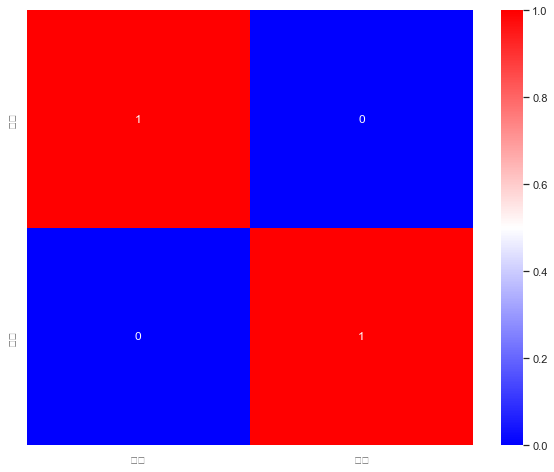

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = df_data.corr().round(1)
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

### 문제 3

> 2번 데이터를 기준으로 최동원의 성적이라면 연봉이 어떨지 예측하시오.